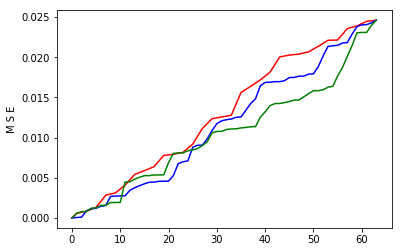

In [7]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt

# Initializing X vector that is of 64 length and each element is between 0 to 0.5
k=64
x = np.random.uniform(low=0,high=0.5,size=(k,1))
x = np.transpose(x)



# Discrete Fourier transform
def dft(n):
    dft_mat = []
    for i in range(n):
        for j in range(n):
            k = i*j
            k1 = np.exp(-((2*1j*np.pi*k)/n))
            dft_mat = np.append(dft_mat,k1)
    dft_mat = np.reshape(dft_mat,(n,n))      
    return dft_mat   

# Discrete Cosine transform
def dct(N):
    dct_mat=[]
    for n in range(N):
        for k in range(N):
            ans = np.cos((np.pi*k*(2*n+1))/(2*N))
            dct_mat = np.append(dct_mat, ans)
            
    dct_mat = np.reshape(dct_mat,(N,N))   
 
    return dct_mat

# Haar transform
def haar(N):
    final=[]
    if N==2:
        return(np.matrix(([1,1],[1,-1])))
    v = np.log2(N)-1
    hn2 = haar(N/2)
    result1 = np.concatenate((hn2,hn2),axis=1)
    matrix1 = (pow(2,v/2))*np.identity(int(N/2))
    result2 = np.concatenate((matrix1,-matrix1),axis=1)
    final = np.concatenate((result1,result2),axis=0)
    return(final)
        

def update_dft(l,ydft,k):
    a = (int((k+1-l)/2))
    b = (int((k+1+l)/2))
    for k in range(a,b, 1):
        ydft[0][k] = 0
    return ydft        


# function to calculate mean square error
def error(x,y,k):
    diff=0
    for i in range(k):
        diff += np.square(abs(x[0][i]- y[0][i]))
    return(diff/k)


def update_dct_haar(l,mat):
    for i in range(l):
        mat[0][l]=0
    return(mat)    
    
        

# DFT
# Calculating dft
ydft = np.matmul(x,dft(k))
final_error=[] 
for L in range(k):
    ydft_updated = update_dft(L,ydft,k)
    xinv = np.linalg.inv(dft(k))
    dft_out = np.matmul(ydft_updated,xinv)
    final_error = np.append(final_error,error(x,dft_out,k))
   
    
  
inputx = np.arange(0,k,1)         
   
# DCT
# calculating dct
ydct = np.matmul(x,dct(k))
final_error_dct=[] 
for L in range(k):
    ydct_updated = update_dct_haar(L,ydct)
    yinv = np.linalg.inv(dct(k))
    dct_out = np.matmul(ydct_updated,yinv)
    final_error_dct= np.append(final_error_dct,error(x,dct_out,k))


# Haar
#calculating haar
haar1 = np.transpose(haar(k))
yhaar = np.matmul(x,haar1)
yhaar = np.array(yhaar)
final_error_haar=[] 
for L in range(k):
    yhaar_updated = update_dct_haar(L,yhaar)
    zinv = np.linalg.inv(np.transpose(haar(k)))
    haar_out = np.matmul(yhaar_updated,zinv)
    haar_out = np.array(haar_out)
    final_error_haar= np.append(final_error_haar,error(x,haar_out,k))

# Plot 
plt.plot(inputx,final_error, 'r', label='DFT', ) 
plt.ylabel("M S E")
plt.plot(inputx,final_error_dct,'b', label = 'DCT') 
plt.plot(inputx,final_error_haar, 'g', label='HAAR')
plt.show()